In [4]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F
from tqdm import tqdm
import os

In [5]:
# os.chdir(os.path.dirname(__file__))

In [6]:
# '模型结构'
class Encoder(torch.nn.Module):
    #编码器，将input_size维度数据压缩为latent_size维度
    def __init__(self, input_size, hidden_size, latent_size):
        super(Encoder, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, latent_size)

    def forward(self, x):# x: bs,input_size
        x = F.relu(self.linear1(x)) #-> bs,hidden_size
        x = self.linear2(x) #-> bs,latent_size
        return x

class Decoder(torch.nn.Module):
    #解码器，将latent_size维度的压缩数据转换为output_size维度的数据
    def __init__(self, latent_size, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.linear1 = torch.nn.Linear(latent_size, hidden_size)
        self.linear2 = torch.nn.Linear(hidden_size, output_size)        

    def forward(self, x): # x:bs,latent_size
        x = F.relu(self.linear1(x)) #->bs,hidden_size
        x = torch.sigmoid(self.linear2(x)) #->bs,output_size
        return x

class AE(torch.nn.Module):
    #将编码器解码器组合，数据先后通过编码器、解码器处理
    def __init__(self, input_size, output_size, latent_size, hidden_size):
        super(AE, self).__init__()
        self.encoder = Encoder(input_size, hidden_size, latent_size)
        self.decoder = Decoder(latent_size, hidden_size, output_size)
    def forward(self, x): #x: bs,input_size
        feat = self.encoder(x) #feat: bs,latent_size
        re_x = self.decoder(feat) #re_x: bs, output_size
        return re_x

In [7]:
#损失函数
#交叉熵，衡量各个像素原始数据与重构数据的误差
loss_BCE = torch.nn.BCELoss(reduction = 'sum')
#均方误差可作为交叉熵替代使用.衡量各个像素原始数据与重构数据的误差
loss_MSE = torch.nn.MSELoss(reduction = 'sum')

'超参数及构造模型'
#模型参数
latent_size =16 #压缩后的特征维度
hidden_size = 128 #encoder和decoder中间层的维度
input_size= output_size = 28*28 #原始图片和生成图片的维度
device =torch.device('cuda' if torch.cuda.is_available() else 'cpu')#训练设备
modelname = 'ae.pth'

#训练参数
epochs = 20 #训练时期
batch_size = 32 #每步训练样本数
learning_rate = 1e-3 #学习率

#建立模型
model = AE(input_size,output_size,latent_size,hidden_size).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# '训练模型'
#准备mnist数据集 (数据会下载到py文件所在的data文件夹下)
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('/data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('/data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=False)
#此方法获取的数据各像素值范围0-1

100%|██████████| 9912422/9912422 [00:00<00:00, 117880404.10it/s]


Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 97219657.96it/s]

Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 35542115.17it/s]


Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13415865.33it/s]


Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw



[eval]epoch:0: 100%|██████████| 313/313 [00:02<00:00, 124.66it/s, loss=90.7]


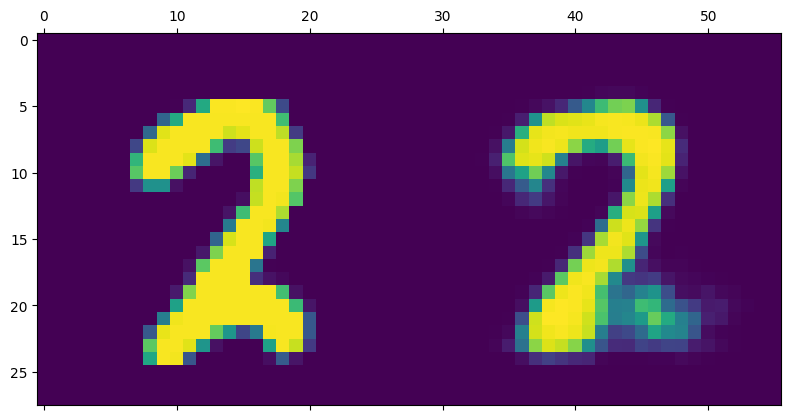

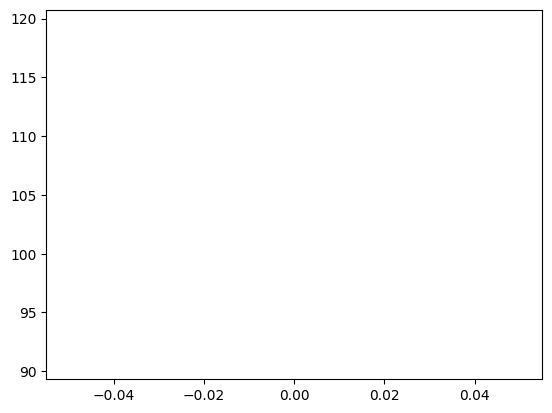

[eval]epoch:1: 100%|██████████| 313/313 [00:02<00:00, 127.25it/s, loss=84.2]


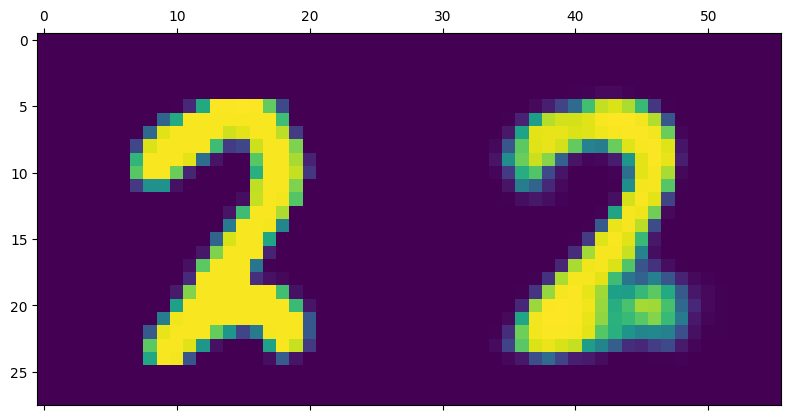

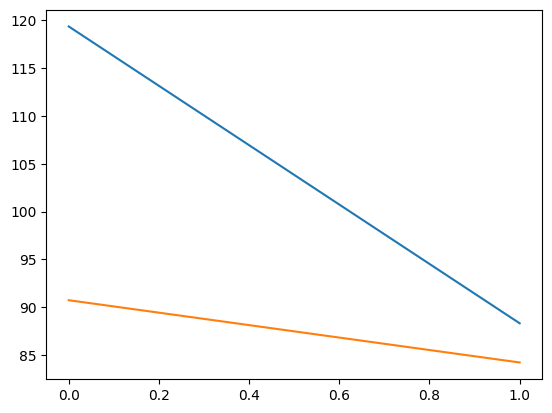

[eval]epoch:2: 100%|██████████| 313/313 [00:02<00:00, 130.46it/s, loss=81.5]


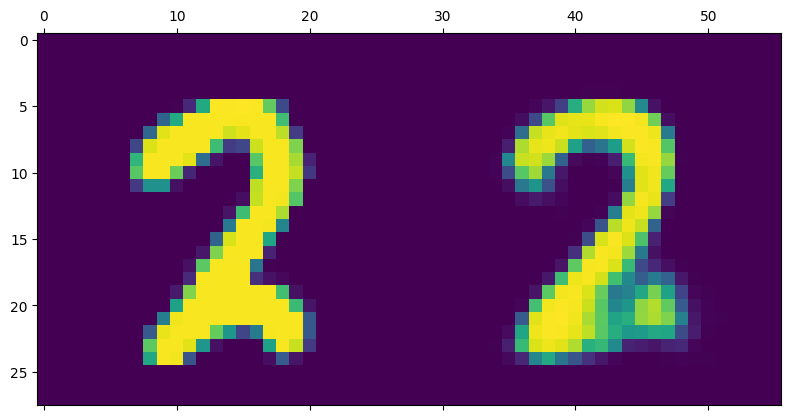

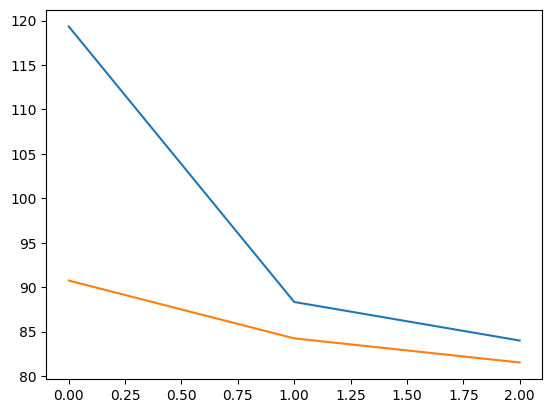

[eval]epoch:3: 100%|██████████| 313/313 [00:02<00:00, 125.94it/s, loss=79.8]


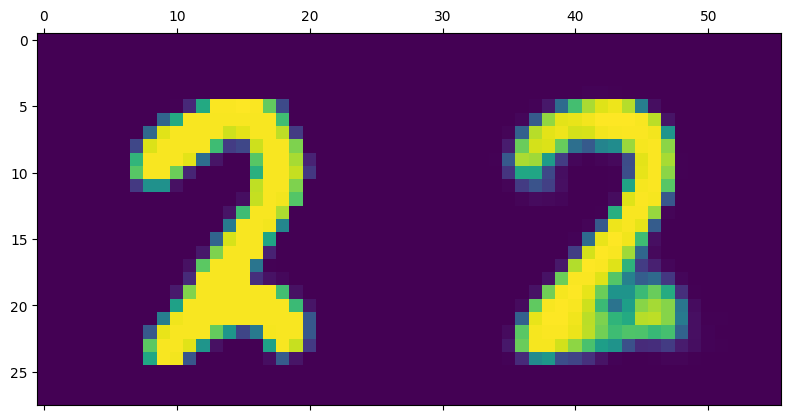

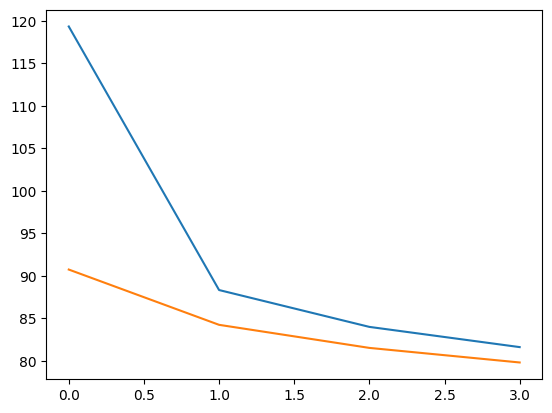

[eval]epoch:4: 100%|██████████| 313/313 [00:02<00:00, 122.78it/s, loss=78.7]


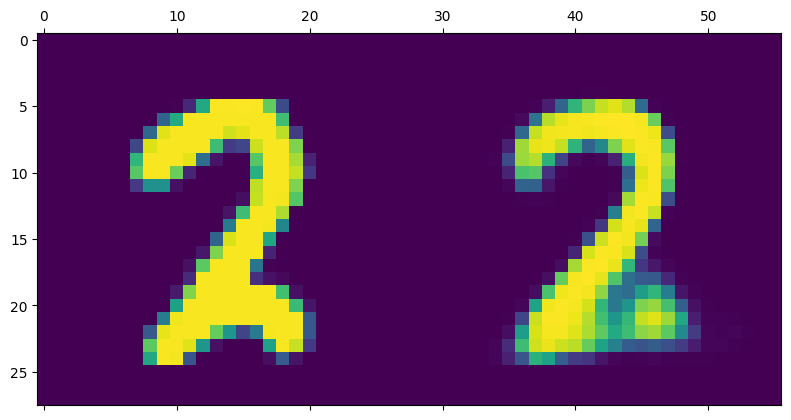

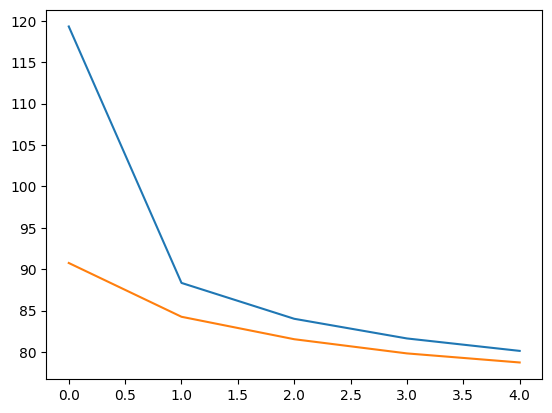

[eval]epoch:5: 100%|██████████| 313/313 [00:02<00:00, 125.57it/s, loss=77.8]


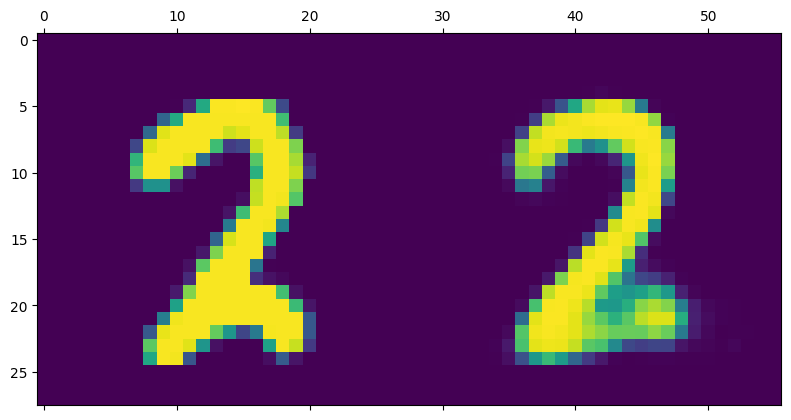

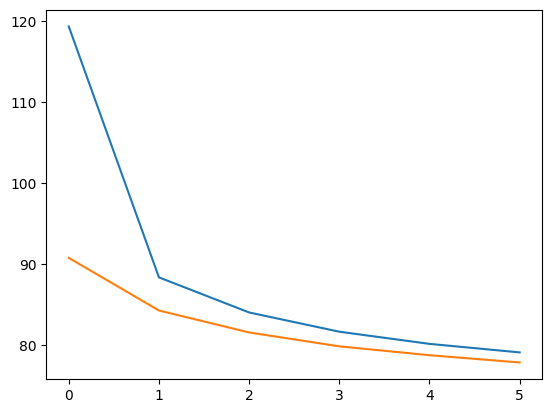

[eval]epoch:6: 100%|██████████| 313/313 [00:02<00:00, 127.51it/s, loss=77.2]


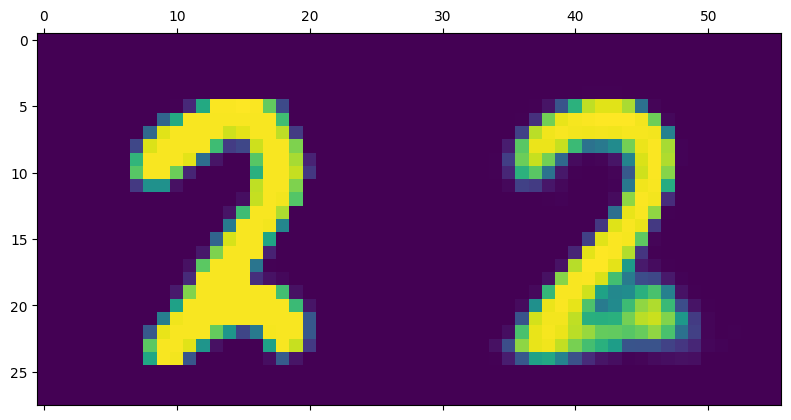

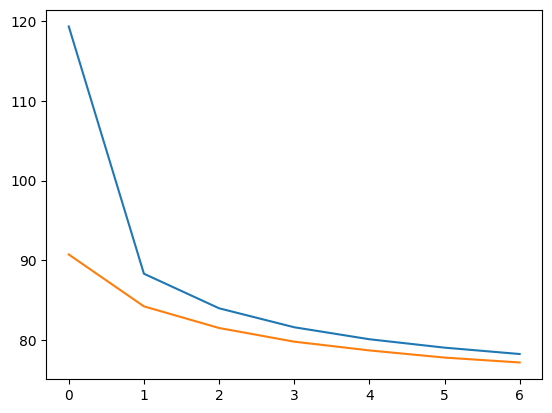

[eval]epoch:7: 100%|██████████| 313/313 [00:02<00:00, 124.90it/s, loss=76.7]


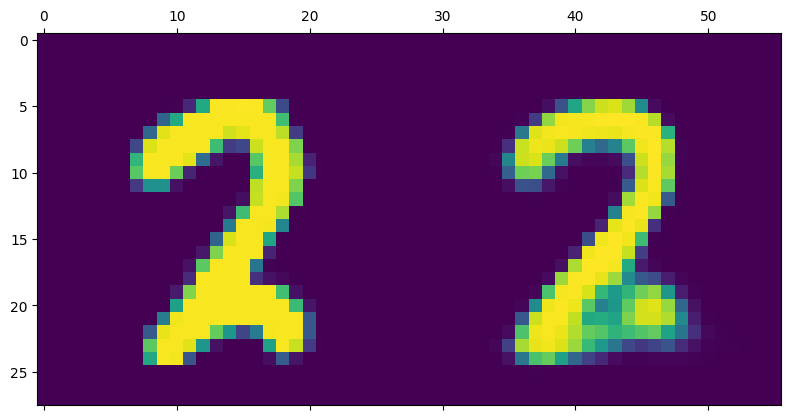

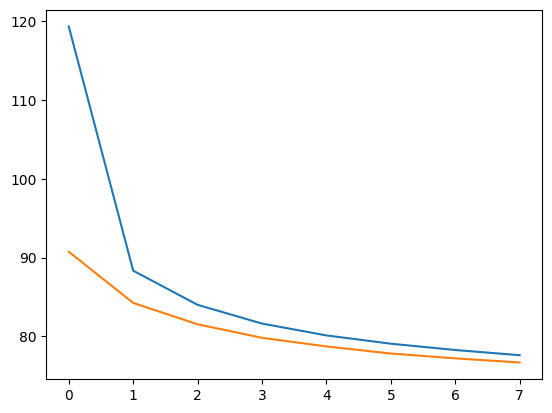

[eval]epoch:8: 100%|██████████| 313/313 [00:02<00:00, 127.30it/s, loss=76.4]


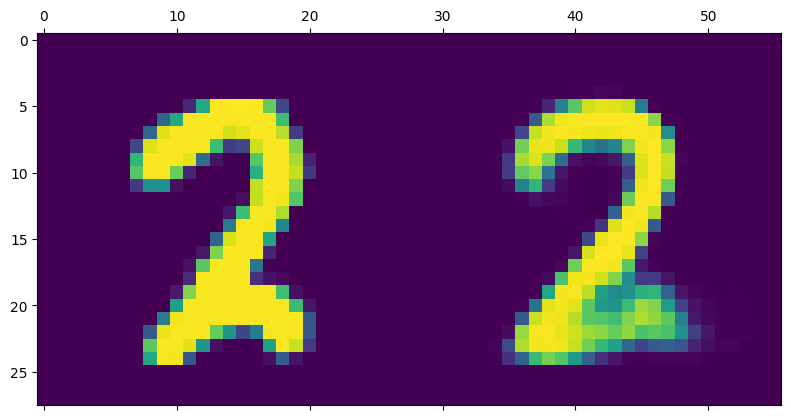

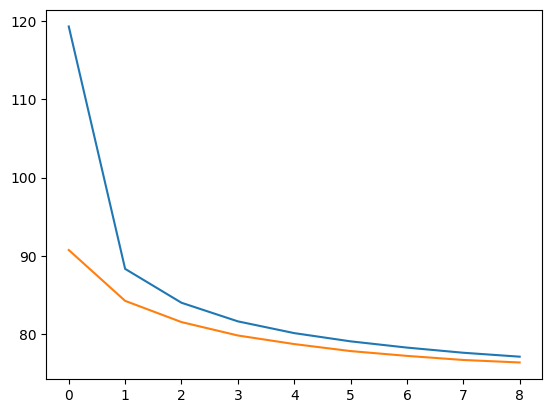

[eval]epoch:9: 100%|██████████| 313/313 [00:02<00:00, 121.80it/s, loss=76]  


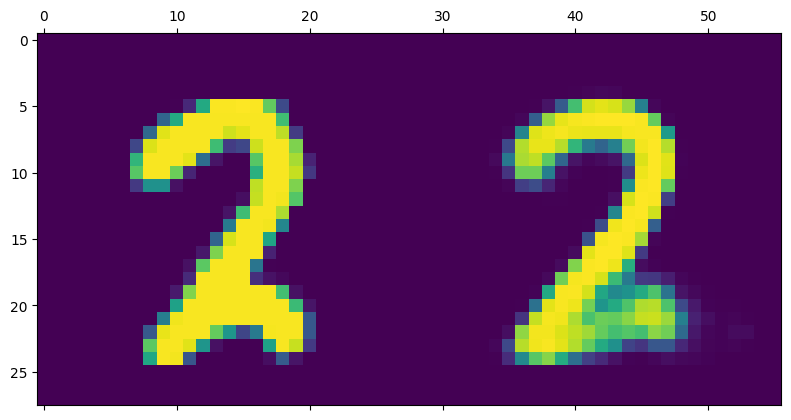

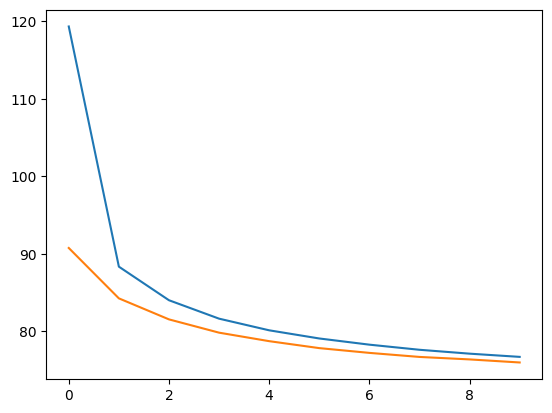

[eval]epoch:10: 100%|██████████| 313/313 [00:02<00:00, 122.10it/s, loss=75.7]


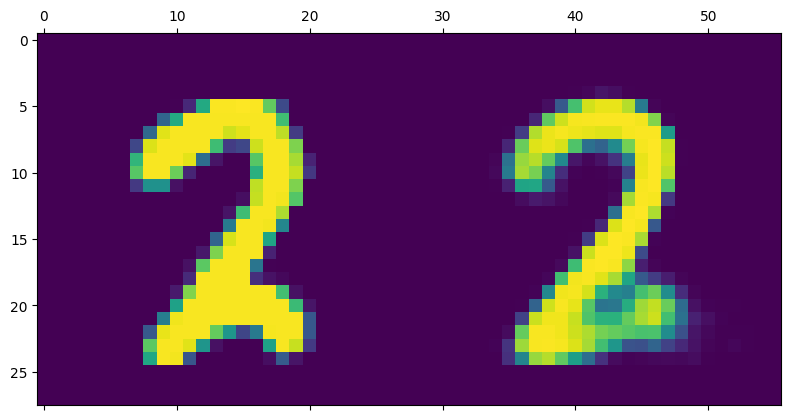

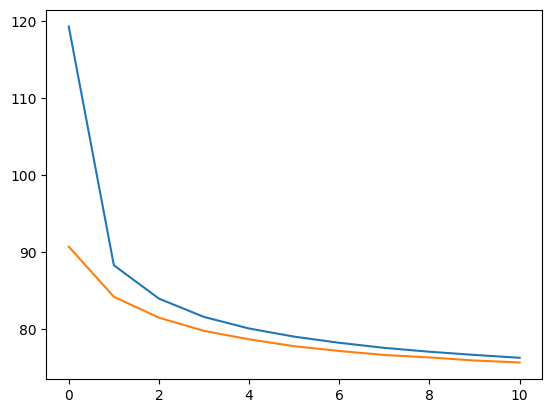

[eval]epoch:11: 100%|██████████| 313/313 [00:02<00:00, 126.56it/s, loss=75.5]


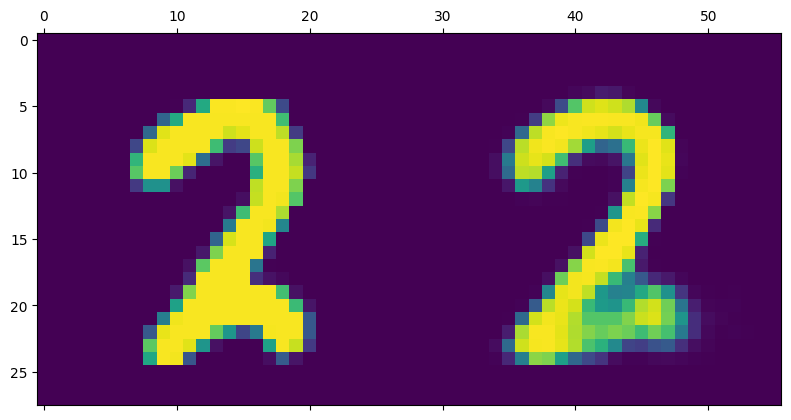

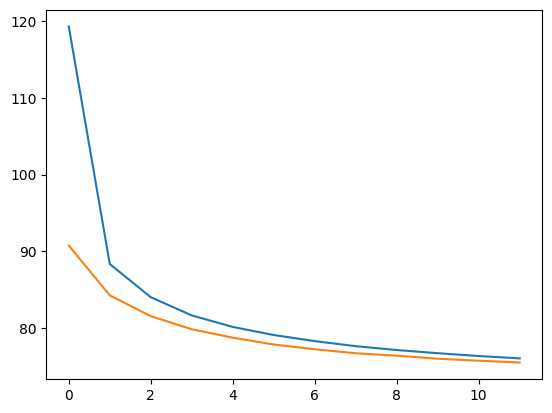

[eval]epoch:12: 100%|██████████| 313/313 [00:02<00:00, 123.88it/s, loss=75.4]


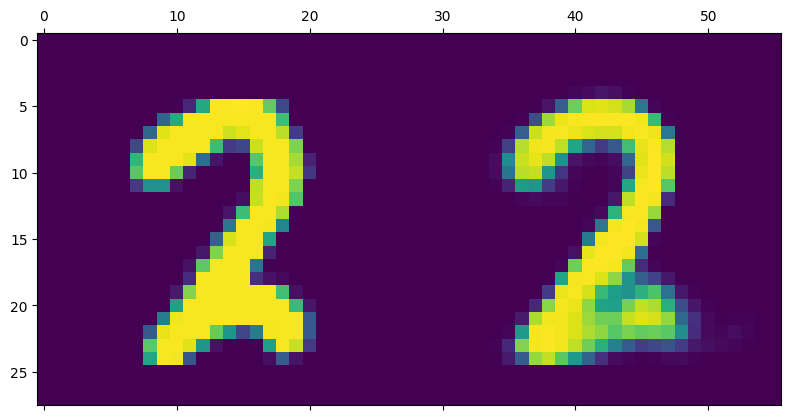

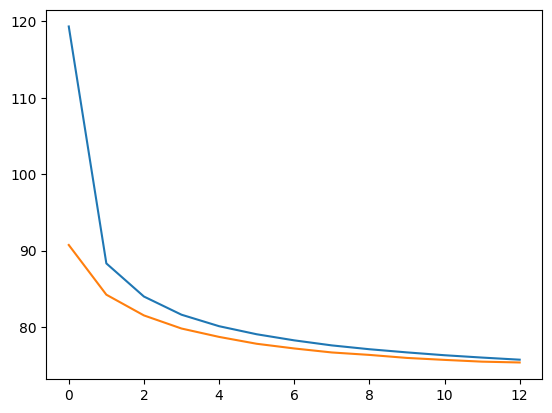

[eval]epoch:13: 100%|██████████| 313/313 [00:02<00:00, 130.83it/s, loss=75.3]


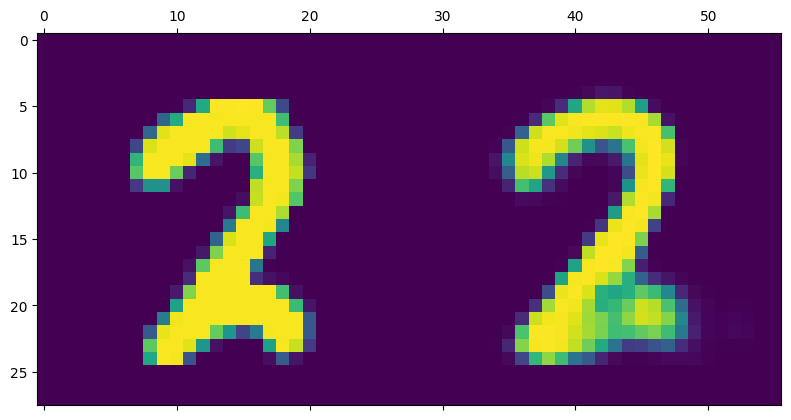

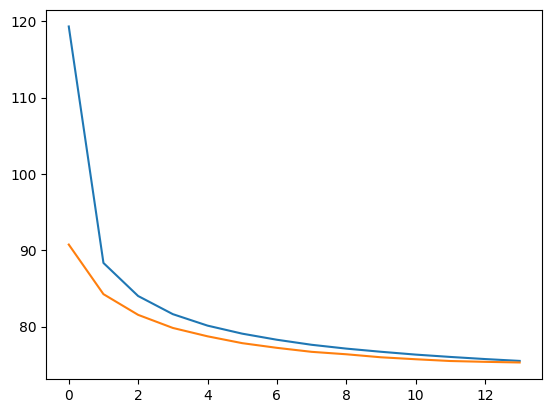

[eval]epoch:14: 100%|██████████| 313/313 [00:02<00:00, 126.61it/s, loss=74.7]


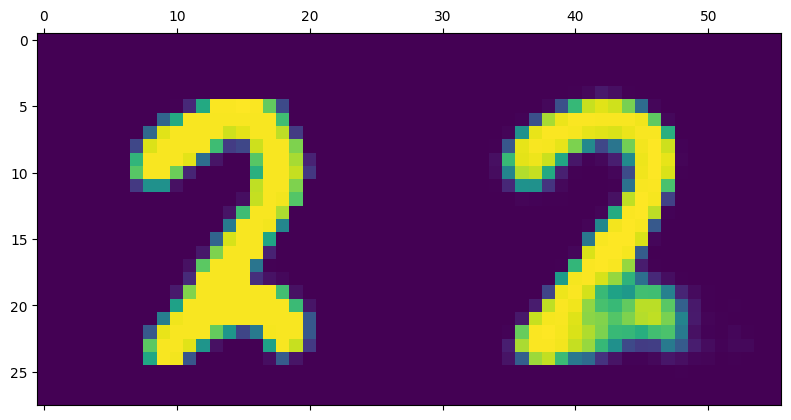

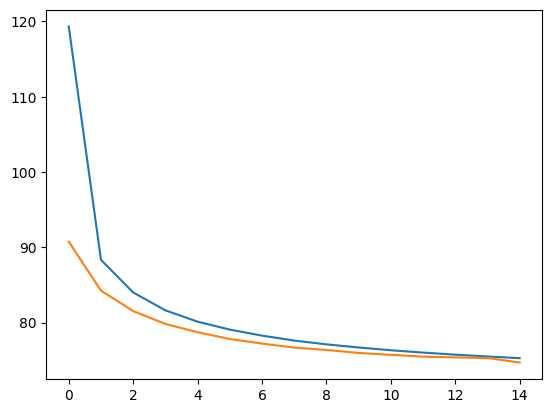

[eval]epoch:15: 100%|██████████| 313/313 [00:02<00:00, 117.60it/s, loss=74.7]


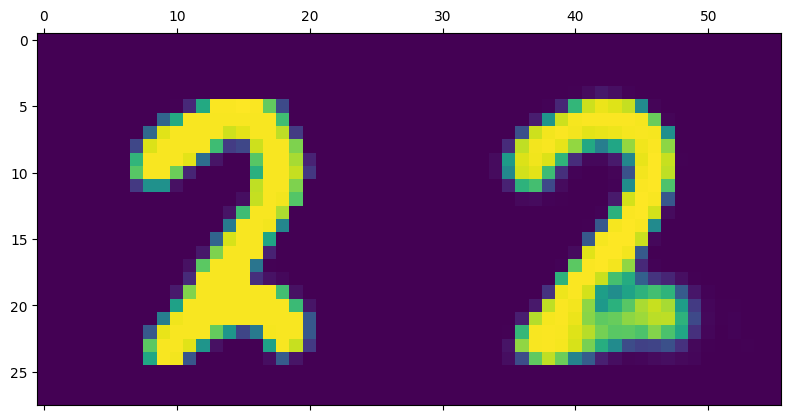

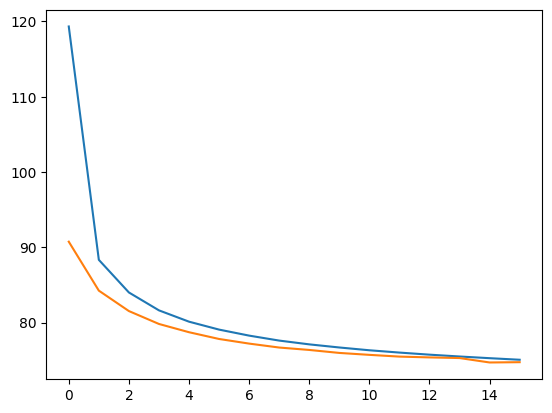

[eval]epoch:16: 100%|██████████| 313/313 [00:02<00:00, 130.13it/s, loss=74.6]


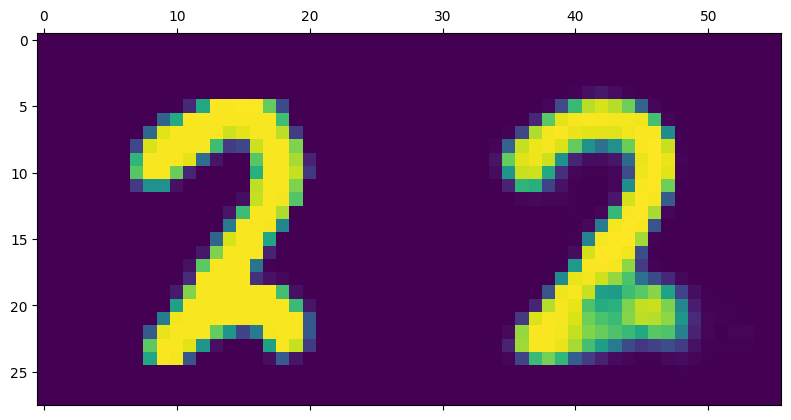

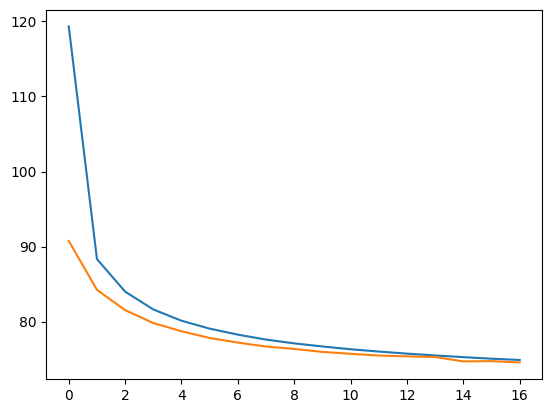

[eval]epoch:17: 100%|██████████| 313/313 [00:02<00:00, 122.12it/s, loss=74.3]


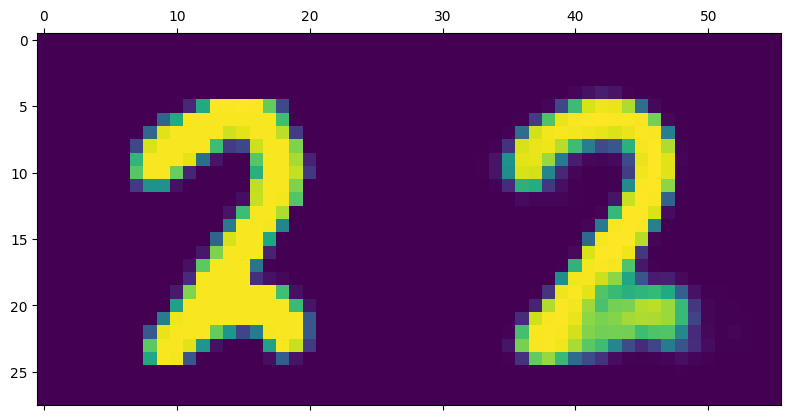

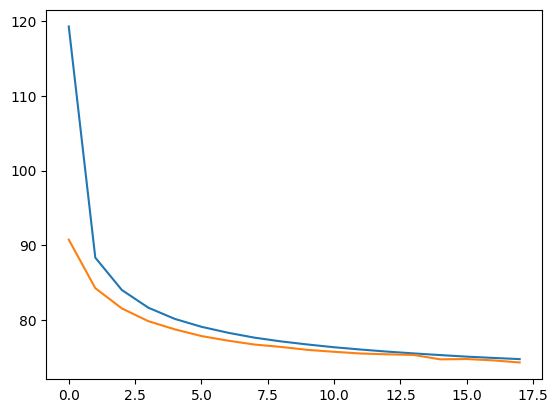

[eval]epoch:18: 100%|██████████| 313/313 [00:02<00:00, 124.61it/s, loss=74.4]


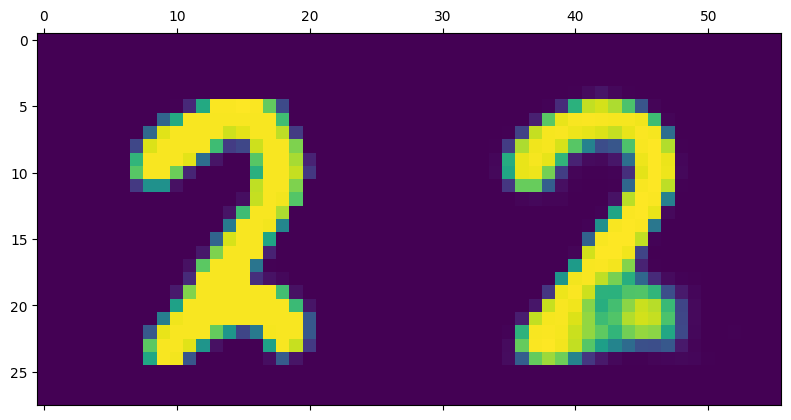

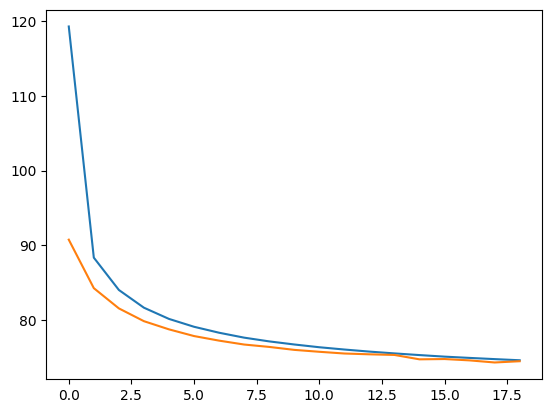

[eval]epoch:19: 100%|██████████| 313/313 [00:02<00:00, 127.76it/s, loss=74.1]


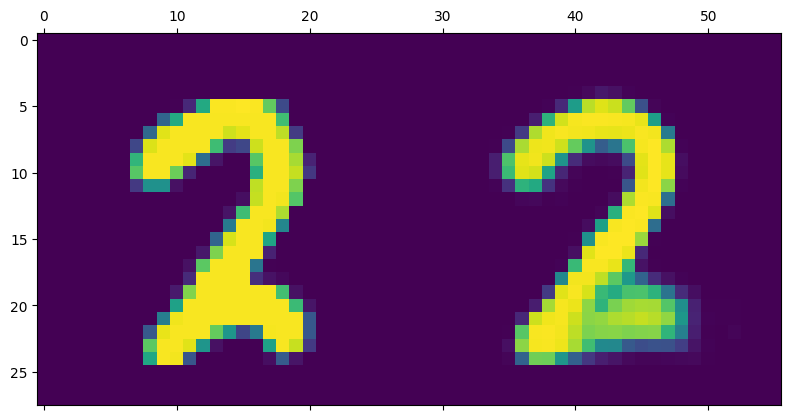

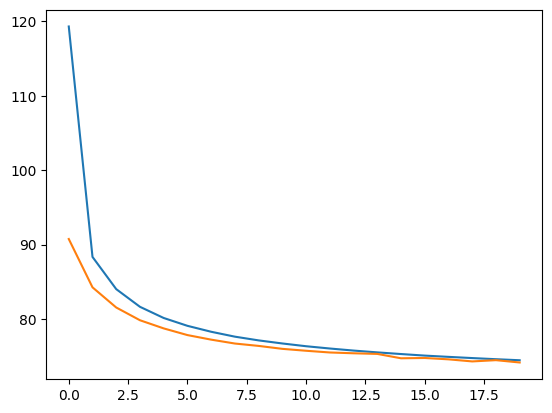

In [8]:
#训练及测试
loss_history = {'train':[],'eval':[]}
for epoch in range(epochs):   
    #训练
    model.train()
    #每个epoch重置损失，设置进度条
    train_loss = 0
    train_nsample = 0
    t = tqdm(train_loader,desc = f'[train]epoch:{epoch}')
    for imgs, lbls in t: #imgs:(bs,28,28)
#         optimizer.zero_grad()
        bs = imgs.shape[0]
        #获取数据
        imgs = imgs.to(device).view(bs,input_size) #imgs:(bs,28*28)
        #模型运算     
        re_imgs = model(imgs)
        #计算损失
        loss = loss_BCE(re_imgs, imgs) # 重构与原始数据的差距(也可使用loss_MSE)
        #反向传播、参数优化，重置
        loss.backward()
        optimizer.step()
        
        optimizer.zero_grad()
        #计算平均损失，设置进度条
        train_loss += loss.item()
        train_nsample += bs
        t.set_postfix({'loss':train_loss/train_nsample})
    #每个epoch记录总损失
    loss_history['train'].append(train_loss/train_nsample)

    #测试
    model.eval()
    #每个epoch重置损失，设置进度条
    test_loss = 0
    test_nsample = 0
    e = tqdm(test_loader,desc = f'[eval]epoch:{epoch}')
    for imgs, label in e:
        bs = imgs.shape[0]
        #获取数据
        imgs = imgs.to(device).view(bs,input_size)
        #模型运算   
        re_imgs = model(imgs)
        #计算损失
        loss = loss_BCE(re_imgs, imgs) 
        #计算平均损失，设置进度条
        test_loss += loss.item()
        test_nsample += bs
        e.set_postfix({'loss':test_loss/test_nsample})
    #每个epoch记录总损失    
    loss_history['eval'].append(test_loss/test_nsample)

    #展示效果   
    #将测试步骤中的数据、重构数据绘图
    concat = torch.cat((imgs[1].view(28, 28),
            re_imgs[1].view( 28, 28)), 1)
    plt.matshow(concat.cpu().detach().numpy())
    plt.show()

    #显示每个epoch的loss变化
    plt.plot(range(epoch+1),loss_history['train'])
    plt.plot(range(epoch+1),loss_history['eval'])
    plt.show()
    #存储模型
    torch.save(model.state_dict(),modelname)

In [9]:
#导入训练好的模型(在其他py文件调用需要先运行 模型结构 和 模型参数 部分)
model = AE(input_size,output_size,latent_size,hidden_size).to(device)
model.load_state_dict(torch.load(modelname))

<All keys matched successfully>